# Øving 10

**Læringsmål:** 

* Filhåndtering
* Plotting
* Repetisjon

I dag finnes det heller ikke slides! Alt av teori gjennomgås i seksjonen under!  

## Snok i skattelister
Hele Norge fikk sin inntekt og formue blottlagt i går, da skattelistene for 2018 ble slupper.  
Vi skal i dag gjøre en analyse av de 100 med høyest inntekt i fjor.


##### Repetisjon av filhåndtering
Som vi gikk gjennom sist, er filer viktig for å gjøre interessante ting med store mengder data.

In [5]:
resultat = [] # Her legger vi det vi skal

# Åpner filen med filnavn numbers.txt og lagrer I variabelen file
file = open("numbers.txt", "r")
for linje in file.readlines(): # leser hver linje av filen
    
    linje = linje.strip() # fjerner whitespace
    linje = linje.split(",") # splitter linjen på komma
    linje = [int(x) for x in linje] # Fancy måte å omgjøre fra str til int
    resultat.append(sum(linje)) # Matrise med alle verdiene
    
print(resultat)
file.close() # Må lukke filen etter å ha lest, with-funksjonen gjør dette enklere


[353, 597, 591, 904, 402, 694, 641, 558, 528, 513, 625, 769, 653, 359, 546, 716, 388, 318, 770, 873]


### Oppgave 1
Vedlagt finner dere filen [skatteliste.txt](skatteliste.txt), som har følgende format:  
#Plassering#;#Navn#;#Fødselsår#;#Inntekt#;#Skatt#;#Formue#  

**a) Lag en funksjon som leser inn filen, splitter på ";" og returnerer resultatet**  
_Eksempel på kjøring:_
```
taxData()
[['1', 'Trond Mohn', '1943', '443240474', '187925575', '5679616340'],
 ['2', 'Bjørn Stray', '1964', '275492265', '86069127', '210296593'],
 ...

```

In [101]:
def taxData():
    resultat = [] # Her legger vi det vi skal returnere

    file = open("skatteliste.txt", "r")
    for linje in file.readlines(): # leser hver linje av filen

        linje = linje.strip() # fjerner whitespace

        linje = linje.split(";") # splitter linjen på komma
        resultat.append(linje)
    file.close()
    return resultat

taxData()[:2]


[['1', 'Trond Mohn', '1943', '443240474', '187925575', '5679616340'],
 ['2', 'Bjørn Stray', '1964', '275492265', '86069127', '210296593']]

For å gjøre gode sammenlikninger, må vi kunne skille ut data av en bestemt type, for eksempel skatt.  
Vi vil derfor ha en funksjon som tar inn feltet vi skal se på (for eksempel "skatt") og gir oss tilbake alle de 100 rikeste sin skatteregning fra i fjor.

**b) Lag en funksjon, getValues(field) som henter ut et bestemt felt fra taxData**  
_Eksempel på kjøring:_
```
getValues("fødselsdato")
['1943', '1964', '1962', '1966'...

getValues("skatt")
['187925575', '86069127', '81013943', '73663663'...
```
_Hint: Bruk taxDictionary som er deklarert under for å slippe masse if-setninger!_

In [102]:
taxDictionary = {
    "plassering": 0,
    "navn": 1,
    "fødselsdato": 2,
    "inntekt": 3,
    "skatt": 4,
    "formue": 5
}

def getValues(field):
    result = []
    index = taxDictionary[field]
    for person in taxData():
        value = person[index]
        if field == "navn":
            result.append(value) # Kan ikke gjøre noe med navn!
        else:
            result.append(int(value))
    return result

getValues("navn")[:4]
    

['Trond Mohn', 'Bjørn Stray', 'Jan Tellef Thorleifsson', 'Torleif Ahlsand']

Siden vi senere skal bruke dataen til å plotte, vil vi ha den i int-format.  

**c) Utvid getValues-funksjonen slik at den returner en liste av ints i stedet for en liste av strings (dersom det er hensiktsmessig)**   
_Eksempel på kjøring:_
```
getValues("fødselsdato")
[1943, 1964, 1962, 1966...

getValues("skatt")
[187925575, 86069127, 81013943, 73663663...
```
_Hint: Bruk taxDictionary som er deklarert under for å slippe masse if-setninger!_

### Plotting i python
Å plotte data er en veldig effektiv måte å finne sammenhenger og se helheten i data.  

I Python bruker vi et bibliotek som heter `matplotlib` for å gjøre plotting.
For å kunne ta `matplotlib`-biblioteket i bruk må vi først *importere* det. I vårt tilfelle trenger vi ikke å importere hele matplotlib, men kun delen `pyplot` som er den delen som lar oss tegne grafer. Denne importerer vi i koden under og kaller for `plt`. Dette gjør at vi senere kun trenger å skrive `plt` i stedet for `matplotlib.pyplot`.



In [27]:
import matplotlib.pyplot as plt
%matplotlib inline 


 `%matplotlib inline` gjør at grafene vises direkte i dokumentet. Uten denne vil du ikke kunne se grafene.


Under ser du et eksempel på en enkel kode som tegner en graf. Dette eksempelet består av tre kodelinjer som alle bruker `pyplot` fra `matplotlib`-biblioteket (som vi har døpt om til `plt`)

- Funksjonen `plt.plot` tar inn en liste med verdier som blir y-verdiene i grafen.
- Funksjonen `plt.xlabel` brukes for å sette teksten som skal være på x-aksen.
- Funksjonen `plt.ylabel` brukes for å sette teksten som skal være på y-aksen.
- Funksjonen `plt.show` brukes for å vise grafen

**Kjør koden under og se hva som skjer!** Prøv gjerne også å endre verdiene og kjøre koden på nytt

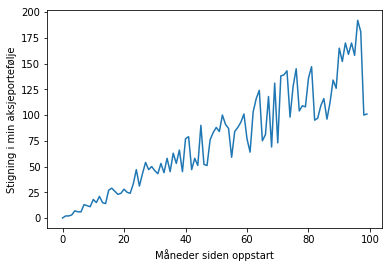

In [32]:
import random
import matplotlib.pyplot as plt
%matplotlib inline 

numbers = []
for x in range(100):
    numbers.append(random.randint(x, 2*x)) # Generer noen tilfeldige tall
    
plt.plot(numbers) #
plt.ylabel('Stigning i min aksjeportefølje')
plt.xlabel('Måneder siden oppstart')
plt.show()

`plt.plot` har mange muligheter! Vi kan for eksempel spesifisere punkter både på x-aksen og y-aksen ved å gi inn to lister til funksjonen. I tillegg kan vi endre på hvordan hvert plottede punkt skal se ut.

**Kjør koden under og prøv å endre verdiene for å se hva som skjer!** 

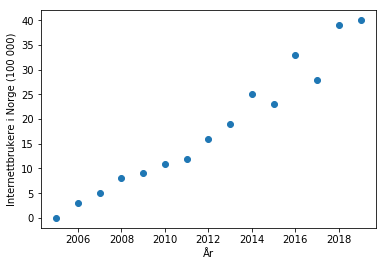

In [37]:
# Har allerede importert pyplot og random i cellen over, trenger ikke gjøre det igjen!

years = list(range(2005, 2020))
numbers = []
for x in range(len(years)):
    numbers.append(random.randint(2*x, 3*x)) # Generer noen tilfeldige tall
 
    
plt.plot(years, numbers, 'o') # 'o' gir oss punkter i stedet for en rett graf!
plt.ylabel('Internettbrukere i Norge (100 000)')
plt.xlabel('År')
plt.show()

Man kan også selvsagt lage plot inne i en funksjon:

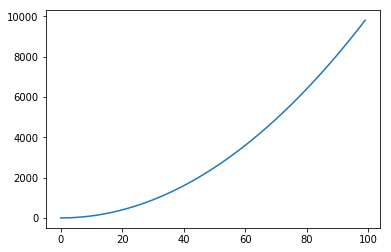

In [104]:
def myPlotter(n):
    values = []
    for i in range(n):
        values.append(i * i)
    
    
    plt.plot(values)
    plt.show()
    
myPlotter(100)

### Oppgave 2
Vi ønsker å plotte rikdom!  


**a) Lag en funksjon som spør brukeren om hvilket felt som skal plottes, og så plotter det. Dersom feltet ikke er gyldig, be på nytt**  
_Eksempel på kjøring:_
```
plotWealth()
Hvilket felt ønsker du å plotte? skatt
<Se plott under>
```

<img src="images/2a.png" width="400" height="200" />


Hvilket felt ønsker du å plotte? plassering


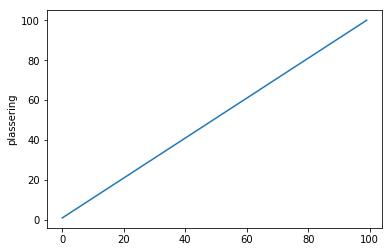

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotWealth():
    field = ''
    while field not in taxDictionary:        
        field = input("Hvilket felt ønsker du å plotte? ")
    values = getValues(field)
    plt.plot(values)
    plt.ylabel(field)
    plt.show()
    

plotWealth()

Vi vil nå lage en funksjon som sammenlikner to personer.  
Den skal ta inn plasseringen til de to som skal sammenliknes, samt hvilket felt som skal sammenliknes.  
Ettersom det ikke gir mening å tegne en linjegraf mellom kun to punkter, bør plottet plottes med punkter.  
**b) Lag funksjonen compare(p1, p2, field) som visualiserer forskjellen mellom to personer. Deres navn skal også være med!**  
_Eksempel på kjøring:_
```
compare(1, 2, "skatt")
<Se under>
```
Hint: Hva er sammenhengen mellom Plassering og python-indekser?

<img src="images/2b.png" width="400" height="200" />

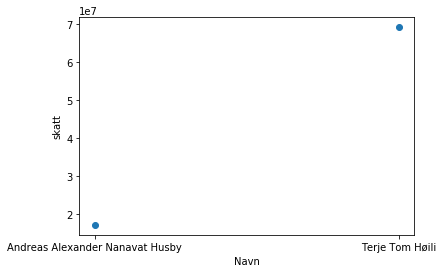

In [105]:
def compare(p1, p2, field):
    values = getValues(field)
    names = getValues("navn")
    p1Value = values[p1 - 1] # Python-indeksering!
    p2Value = values[p2 - 1]
    p1Name = names[p1 - 1]
    p2Name = names[p2 - 1]
    plt.plot([p1Name, p2Name], [p1Value, p2Value], 'o')
    plt.xlabel("Navn")        
    plt.ylabel(field)
    plt.show
compare(58, 5, "skatt")

### Oppgave 3
Vi vil nå se på den _kumulative_ rikdommen til alle 100 i lista.  
I denne oppgaven må dere definere funksjoner selv.


**Lag en funksjon som plotter de totale verdiene av et bestemt felt.**  
Det skal være kumulativt, som vil si at første verdi er person nummer én sin rikdom (for eksempel, formue),
verdi nummer to er person 1 & 2 sin samlede formue, verdi nummer tre er person 1 & 2 & 3 sin samlede formue, og så videre

_Eksempel på kjøring:_
```
dinFunk
<Se under>
```


<img src="images/3.png" width="400" height="200" />

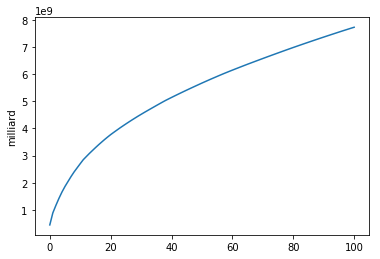

In [108]:
def findCumulativeWealth(field):
    values = getValues(field)
    totalValues = []
    totalValues.append(values[0])
    for value in values:
        totalValues.append(totalValues[-1] + value)
    return totalValues

def plotCumulativeWealth(field):
    cumulativeValues = findCumulativeWealth(field)
    plt.plot(cumulativeValues)
    plt.ylabel("milliard")
    plt.show()
    

plotCumulativeWealth("inntekt")


### Oppgave 4 🌟
Lag en versjon av funksjonen fra oppgave 2b) som kan sammenlikne et vilkårlig antall personer.  
Lag deretter en funksjon som tar inn **navnene** på de som skal sammenliknes samt felt, og deretter plotter dette.  

**Bonus: Få med tallverdien i hvert punkt**

_Eksempel på kjøring:_
```
plotManyPersons(['Trond Mohn', 'Jo Nesbø', 'Martin Lippert', 'Herman Friele', 'Edgar Haugen'], "inntekt")
```
Se under

<img src="images/4.png" width="400" height="200" />

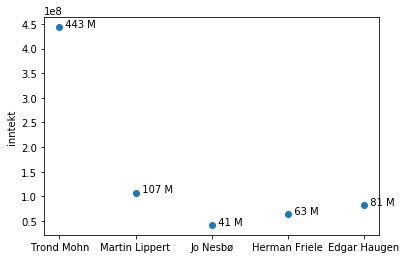

In [99]:
def compareMany(persons, field):
    values = getValues(field)
    compareValues = []
    for person in persons:
        compareValues.append(values[person])
    
    return compareValues

def plotManyPersons(names, field):
    
    persons = []
    allNames = getValues("navn")
    for name in names:        
        index = allNames.index(name)
        persons.append(index)
    
    compareValues = compareMany(persons, field)
    ax = plt.gca()
    ax.invert_xaxis()
    plt.plot(names, compareValues, 'o')
    plt.ylabel(field)
    
    for a,b in zip(names, compareValues): 
        inMillions = b // 1000000
        value = f'  {inMillions} M'
        plt.text(a, b, value)

    plt.show()
    

plotManyPersons(['Trond Mohn', 'Jo Nesbø', 'Martin Lippert', 'Herman Friele', 'Edgar Haugen'], "inntekt")